# Datathon

## Logística del comercio mundial

La logística es un mercado vital en el mundo globalizado y conectado donde vivimos, coordinar el transporte de toda la cadena de suministros desde donde son producidos los bienes hasta que llegan al cliente final es una tarea compleja, que debe ser planificada y ejecutada correctamente para el funcionamiento del comercio, tanto local como mundial. 

Gracias a las nuevas herramientas como el uso de geolocalizadores, registros digitales de entrada/salida de los centros de distribución, distintos medios de transporte terrestres, marítimos y aéreos, además de las herramientas de IoT en toda la cadena de suministro y producción, es posible acumular muchísimos datos, que pueden ser analizados para optimizar los procesos logísticos.

## Descripción del problema

Somos parte de una empresa de logística que trabaja para un portal importante de E-Commerce, y nuestro Team Leader nos da la tarea de implementar un modelo que nos permita predecir si un envío llegará a tiempo o no, según la información contenida en el dataset puesto a disposición para poder prestar atención y mejor seguimiento a aquellos envíos que pueden llegar a dar problemas.

## Entrega
Deben tener el código en un archivo .py o un Jupyter Notebook .ipynb. Debe incluir un buen análisis EDA, feature engineerging explicar paso a paso en el notebook qué hicieron y por qué o adjuntar documentación en archivo PDF o presentación. Es obligatorio que el script genere un archivo .csv sólo con las predicciones, una columna que debe llamarse 'pred' y tenga todos los valores de las predicciones, un valor por fila. De no llamarse así la columna, nuestro script de validación NO LO VA A TOMAR. El nombre del archivo debe ser su usuario de github, si su usuario de github es 'pjr95', el archivo .csv con las predicciones debe llamarse 'pjr95.csv'. Vamos a validar tanto los datos que suban como el código.

## Carga de datos

El archivo a utilizar para entrenar nuestro modelo es el archivo: "E-Commerce_train.xlsx"

In [1]:
import pandas as pd

#cargo la info al dataframe

df = pd.read_excel("E-Commerce_train.xlsx") 

#imprimo el dataframe

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Veamos la informacion del dataframe, buscamos datos nulos y duplicados.
-Contiene 12 columnas y 8999 registros.<br>
-No hay registros nulos.<br>
-No hay registros duplicados.

In [2]:
#nos devuleve la info del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [3]:
#chequeamos por valores nulos en cada columna

df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [4]:
#buscamos registros duplicados

df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


### Veamos cuantos envios llegaron a tiempo y cuantos no:<br>

In [5]:
df["Reached.on.Time_Y.N"].value_counts()

1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

Es decir:
- A timepo: 5719 envios.
- Tardios: 3280 envios.

De un total de 8999 envios, el 36.44% de los envios no llegaron a tiempo.

In [5]:
ontime=df["Reached.on.Time_Y.N"]==1 #creo un filtro para los valores a tiempo
offtime=df["Reached.on.Time_Y.N"]==0 #creo un flitro para los valores que no llegaron a tiempo

## Exploramos el dataframe  (EDA)
Analizamos columna por columna, buscamos outliers, valores atipicos y, de ser necesario, escalamos y codificamos las variables categóricas

### Columna "ID"
-Esta columna nos indica el ID de cada una de las transacciones y por lo tanto puede ser eliminada ya que no nos interesa para el modelo

In [2]:
df.drop("ID", axis=1, inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


### Columna "Warehouse_block" (Bloque del Depósito)

-Como se puede observar esta columna indica desde que bloque del depósito salió la mercadería. Cada bloque se indica con una letra, "A", "B", "C", "D", "F". 

In [8]:
#vemos los valores que puede tomar la variable
df["Warehouse_block"].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [9]:
#contamos cuantas veces aparece cada bloque

df["Warehouse_block"].value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [10]:
#Contamos los valores que llegaron a tiempo para cada bloque

df["Warehouse_block"][ontime].value_counts()

F    1904
B     964
D     959
C     953
A     939
Name: Warehouse_block, dtype: int64

In [11]:
#Contamos los valores que no llegaron a tiempo para cada bloque

df["Warehouse_block"][offtime].value_counts() 

F    1095
A     561
C     547
D     541
B     536
Name: Warehouse_block, dtype: int64

### Graficamos su distribución en barras separadas, por cantidad de envios que no llegaron a tiempo y que si llegaron a tiempo:<br>


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

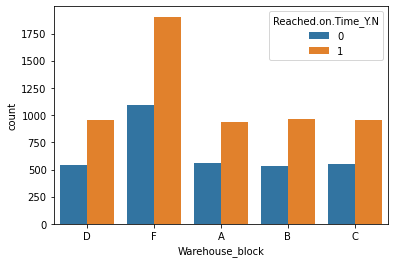

In [13]:
sns.countplot(data=df, x="Warehouse_block", hue="Reached.on.Time_Y.N")
plt.show()

### Graficamos su distribución en diagrama de torta, vemos que porcentaje de envios sale de cada bloque:<br>

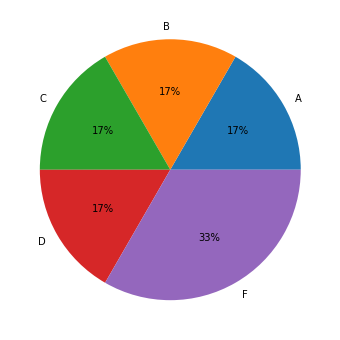

In [148]:
depositos=df["Warehouse_block"].value_counts().reset_index() 
depositos.columns=["Bloque","Cant"]
depositos=depositos.sort_values("Bloque").reset_index().drop(["index"], axis=1)
fig = plt.figure(figsize = (6, 6), facecolor="white")
colors= sns.color_palette('tab10')
plt.pie(depositos["Cant"], labels=depositos["Bloque"], colors = colors, autopct='%.0f%%')
plt.show()

### Ahora vemos que porcentaje de envios procedentes de cada bloque no llego a tiempo

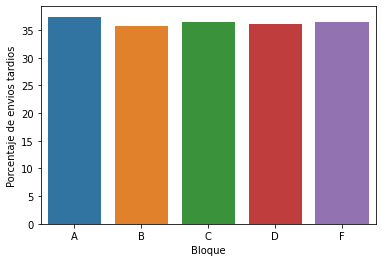

Porcentaje envios tardios para 'A': 37.4 %
Porcentaje envios tardios para 'B': 35.7 %
Porcentaje envios tardios para 'C': 36.5 %
Porcentaje envios tardios para 'D': 36.1 %
Porcentaje envios tardios para 'F': 36.5 %


In [167]:
depositos_no=df["Warehouse_block"][offtime].value_counts().reset_index() #contar solo envios que no llegan desde la columna "Warehosue_block"
depositos_no.columns=["Bloque","Cant"] #nombro las columnas
depositos_no=depositos_no.sort_values("Bloque").reset_index().drop(["index"], axis=1)
ax=sns.barplot(x=depositos["Bloque"], y=(depositos_no["Cant"]/depositos["Cant"]*100)).set_ylabel("Porcentaje de envios tardios")
plt.show()
print ("Porcentaje envios tardios para 'A':", round((depositos_no["Cant"][0]/depositos["Cant"][0]*100),1), "%")
print ("Porcentaje envios tardios para 'B':", round((depositos_no["Cant"][1]/depositos["Cant"][1]*100),1), "%")
print ("Porcentaje envios tardios para 'C':", round((depositos_no["Cant"][2]/depositos["Cant"][2]*100),1), "%")
print ("Porcentaje envios tardios para 'D':", round((depositos_no["Cant"][3]/depositos["Cant"][3]*100),1), "%")
print ("Porcentaje envios tardios para 'F':", round((depositos_no["Cant"][4]/depositos["Cant"][4]*100),1), "%")


-Observamos que, el Bloque "F" realizo más envios que el resto.<br>
-Observamos que la distribucion, entre los envios que llegaron a tiempo y los que no para cada bloque, son:

- Bloque A: 1500 envios, 939 envios a tiempo, 561 envios tardios, 37.4% de los envios del bloque A no llegaron a tiempo.
- Bloque B: 1500 envios, 964 envios a tiempo, 536 envios tardios, 35.7% de los envios del bloque B no llegaron a tiempo.
- Bloque C: 1500 envios, 953 envios a tiempo, 547 envios tardios, 36.5% de los envios del bloque C no llegaron a tiempo.
- Bloque D: 1500 envios, 959 envios a tiempo, 541 envios tardios, 36.1% de los envios del bloque D no llegaron a tiempo.
- Bloque F: 2999 envios, 1904 envios a tiempo, 1095 envios tardios, 36.5 % de los envios del bloque F no llegaron a tiempo.

Se puede concluir que, segun el bloque de deposito donde haya salido el envio, el porcentaje de envios tardios varia muy poco.<br>
El bloque "A" es el que más porcentaje envios tardios tiene y el bloque B el que menos.<br>


### Columna "Mode_of_Shipment" (Modo de Envio)

-Como se puede observar esta columna indica el modo de envío de la mercadería. Hay tres tipos, "Flight" (Aereo), "Ship" (Barco) y "Road" (Por tierra).

In [15]:
df["Mode_of_Shipment"].unique() #vemos los valores que puede tomar la variable

array(['Flight', 'Ship', 'Road'], dtype=object)

In [58]:
#contamos cuantas veces aparece cada modo de envio

df["Mode_of_Shipment"].value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [17]:
df["Mode_of_Shipment"][ontime].value_counts() #Contamos los valores que llegaron a tiempo para cada modo de envio

Ship      3902
Flight     934
Road       883
Name: Mode_of_Shipment, dtype: int64

In [18]:
df["Mode_of_Shipment"][offtime].value_counts() #Contamos los valores que no llegaron a tiempo para cada modo de envio

Ship      2220
Road       547
Flight     513
Name: Mode_of_Shipment, dtype: int64

### Graficamos su distribución en barras separadas, por cantidad de envios que no llegaron a tiempo y que si llegaron a tiempo:<br>

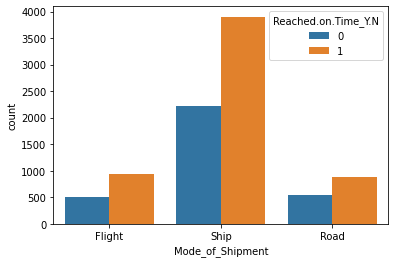

In [19]:
sns.countplot(data=df, x="Mode_of_Shipment", hue="Reached.on.Time_Y.N")
plt.show()

### Graficamos su distribución en diagrama de torta, vemos que porcentaje de envios se hace utilizadando cada modo:<br>

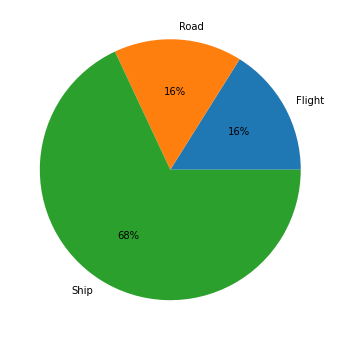

In [143]:
modo_envio=df["Mode_of_Shipment"].value_counts().reset_index() 
modo_envio.columns=["ModoEnv","Cant"]
modo_envio=modo_envio.sort_values("ModoEnv").reset_index().drop(["index"], axis=1)
fig = plt.figure(figsize = (6, 6), facecolor="white")
colors= sns.color_palette('tab10')
plt.pie(modo_envio["Cant"], labels=modo_envio["ModoEnv"], colors = colors, autopct='%.0f%%')
plt.show()

### Ahora vemos que porcentaje de envios segun el modo de envio no llego a tiempo

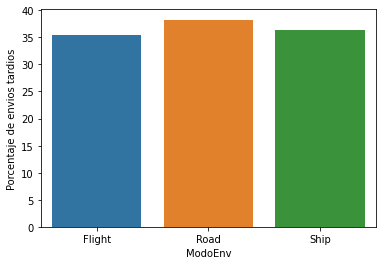

Porcentaje envios tardios para 'Flight': 35.5 %
Porcentaje envios tardios para 'Road': 38.3 %
Porcentaje envios tardios para 'Ship': 36.3 %


In [166]:
modo_envio_no=df["Mode_of_Shipment"][offtime].value_counts().reset_index()
modo_envio_no.columns=["ModoEnv","Cant"]  #contar solo envios que no llegan desde la columna "Mode_of_Shipment"
modo_envio_no=modo_envio_no.sort_values("ModoEnv").reset_index().drop(["index"], axis=1)
ax=sns.barplot(x=modo_envio["ModoEnv"], y=(modo_envio_no["Cant"]/modo_envio["Cant"]*100)).set_ylabel("Porcentaje de envios tardios")
plt.show()
print ("Porcentaje envios tardios para 'Flight':", round((modo_envio_no["Cant"][0]/modo_envio["Cant"][0]*100),1), "%")
print ("Porcentaje envios tardios para 'Road':", round((modo_envio_no["Cant"][1]/modo_envio["Cant"][1]*100),1), "%")
print ("Porcentaje envios tardios para 'Ship':", round((modo_envio_no["Cant"][2]/modo_envio["Cant"][2]*100),1), "%")


-Observamos que, el Modo de envio "Ship" (Barco) realizo mucho más envios que el resto, lo que podria desbalancear el modelo.<br>
-Observamos que la distribucion, entre los envios que llegaron a tiempo y los que no para cada Modo de envio, son:

- Modo envio "Ship": 6122 envios, 3902 envios a tiempo, 2220 envios tardios, 36.3 % de los envios maritimos no llegaron a tiempo.
- Modo envio "Flight": 1447 envios, 934 envios a tiempo, 513 envios tardios, 35.5 % de los envios aereos no llegaron a tiempo.
- Modo envio "Road": 1430 envios, 883 envios a tiempo, 547 envios tardios, 38.3 % de los envios terrestres no llegaron a tiempo.

Se aprecia que, aunque las diferecnias son minimas, los envios por tierra son menos eficientes y los envios por aire más eficientes.

### Columna "Customer_care_calls" (Llamadas al servicio a cliente)

-Como se puede observar esta columna indica cuantas llamadas se recibienron al centro de atencion al cliente por cada uno de los envios. Encontramos que se realizan entre 2 y 7 llamadas.

In [156]:
df["Customer_care_calls"].unique() #vemos los valores que puede tomar la variable

array([4, 2, 3, 5, 6, 7], dtype=int64)

In [158]:
#contamos cuantas llamadas por envio hay

df["Customer_care_calls"].value_counts()

4    2892
3    2743
5    1820
6     803
2     554
7     187
Name: Customer_care_calls, dtype: int64

In [23]:
#Contamos los valores que llegaron a tiempo segun la cantidad de llamadas

df["Customer_care_calls"][ontime].value_counts()

4    1840
3    1817
5    1157
6     420
2     381
7     104
Name: Customer_care_calls, dtype: int64

In [24]:
#Contamos los valores que no llegaron a tiempo segun la cantidad de llamadas

df["Customer_care_calls"][offtime].value_counts()

4    1052
3     926
5     663
6     383
2     173
7      83
Name: Customer_care_calls, dtype: int64

### Graficamos su distribución en barras separadas, por cantidad de envios que no llegaron a tiempo y que si llegaron a tiempo:<br>

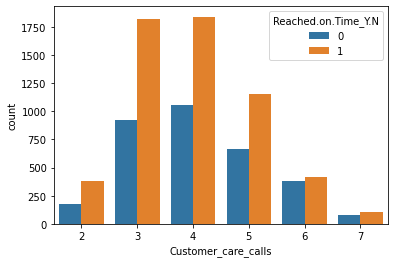

In [25]:
sns.countplot(data=df, x="Customer_care_calls", hue="Reached.on.Time_Y.N")
plt.show()

### Graficamos su distribución en diagrama de torta, vemos que porcentaje de cantidad llamadas por envio se reciben:<br>

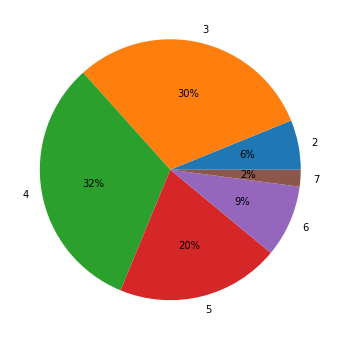

In [159]:
puntaje=df["Customer_care_calls"].value_counts().reset_index() 
puntaje.columns=["Llamadas","Cant"]
puntaje=puntaje.sort_values("Llamadas").reset_index().drop(["index"], axis=1)
fig = plt.figure(figsize = (6, 6), facecolor="white")
colors= sns.color_palette('tab10')
plt.pie(puntaje["Cant"], labels=puntaje["Llamadas"], colors = colors, autopct='%.0f%%')
plt.show()

### Ahora vemos que porcentaje de envios segun la cantidad de llamadas no llego a tiempo

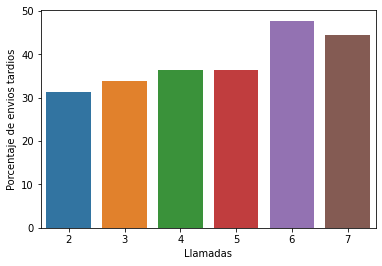

Porcentaje envios tardios para '2 llamadas': 31.2 %
Porcentaje envios tardios para '3 llamadas': 33.8 %
Porcentaje envios tardios para '4 llamadas': 36.4 %
Porcentaje envios tardios para '5 llamadas': 36.4 %
Porcentaje envios tardios para '6 llamadas': 47.7 %
Porcentaje envios tardios para '7 llamadas': 44.4 %


In [165]:
puntaje_no=df["Customer_care_calls"][offtime].value_counts().reset_index() #contar solo envios que no llegan desde la columna "Customer_care_calls"
puntaje_no.columns=["Llamadas","Cant"] #nombro las columnas
puntaje_no=puntaje_no.sort_values("Llamadas").reset_index().drop(["index"], axis=1)
ax=sns.barplot(x=puntaje["Llamadas"], y=(puntaje_no["Cant"]/puntaje["Cant"]*100)).set_ylabel("Porcentaje de envios tardios")
plt.show()
print ("Porcentaje envios tardios para '2 llamadas':", round((puntaje_no["Cant"][0]/puntaje["Cant"][0]*100),1), "%")
print ("Porcentaje envios tardios para '3 llamadas':", round((puntaje_no["Cant"][1]/puntaje["Cant"][1]*100),1), "%")
print ("Porcentaje envios tardios para '4 llamadas':", round((puntaje_no["Cant"][2]/puntaje["Cant"][2]*100),1), "%")
print ("Porcentaje envios tardios para '5 llamadas':", round((puntaje_no["Cant"][3]/puntaje["Cant"][3]*100),1), "%")
print ("Porcentaje envios tardios para '6 llamadas':", round((puntaje_no["Cant"][4]/puntaje["Cant"][4]*100),1), "%")
print ("Porcentaje envios tardios para '7 llamadas':", round((puntaje_no["Cant"][5]/puntaje["Cant"][5]*100),1), "%")

-Observamos que, se reciben al menos 2 llamadas por envio.<br>
-Observamos que la distribución, entre los envios que llegaron a tiempo y los que no según la cantidad de llamadas, son:

- 2 llamadas: 554 envios, 381 envios a tiempo, 173 envios tardios, 31.2 % de los envios con 2 llamadas no llegaron a tiempo.
- 3 llamadas: 2743 envios, 1817 envios a tiempo, 926 envios tardios, 33.8 % de los envios con 3 llamadas no llegaron a tiempo.
- 4 llamadas: 2892 envios, 1840 envios a tiempo, 1052 envios tardios, 36.4 % de los envios con 4 llamadas no llegaron a tiempo.
- 5 llamadas: 1820 envios, 1157 envios a tiempo, 663 envios tardios, 36.4 % de los envios con 5 llamadas no llegaron a tiempo.
- 6 llamadas: 803 envios, 420 envios a tiempo, 383 envios tardios, 47.7 % de los envios con 6 llamadas no llegaron a tiempo.
- 7 llamadas: 187 envios, 104 envios a tiempo, 83 envios tardios, 44.4 % de los envios con 7 llamadas no llegaron a tiempo.

Se puede advertir que mientras mas llamadas se hacen, sube el porcentaje de envios que no llegan a tiempo.<br>
Por otro lado, estamos buscando la forma de predecir si un envio llega o no a tiempo, esta metrica en un caso real debería actualizarse permanentemente en caso de ser utilizada.

### Columna "Customer_rating" (Puntuacion del cliente)

-Como se puede observar esta columna indica el puntaje que el cliente indico para cada transaccion. Encontramos que el puntaje varía entre 1 y 5 puntos.

In [168]:
#vemos los valores que puede tomar la variable

df["Customer_rating"].unique()

array([2, 5, 3, 1, 4], dtype=int64)

In [169]:
#contamos los puntajes recibidos por envio

df["Customer_rating"].value_counts()

3    1836
1    1823
4    1802
5    1779
2    1759
Name: Customer_rating, dtype: int64

In [170]:
#Contamos los valores que llegaron a tiempo segun el puntaje

df["Customer_rating"][ontime].value_counts()

3    1180
5    1144
4    1144
1    1142
2    1109
Name: Customer_rating, dtype: int64

In [171]:
#Contamos los valores que no llegaron a tiempo segun la cantidad de llamadas

df["Customer_rating"][offtime].value_counts()

1    681
4    658
3    656
2    650
5    635
Name: Customer_rating, dtype: int64

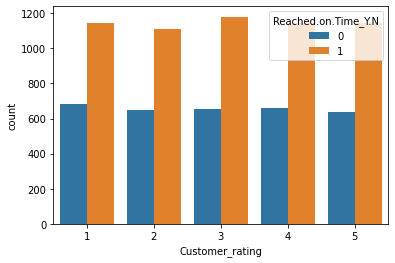

In [172]:
sns.countplot(data=df, x="Customer_rating", hue="Reached.on.Time_Y.N")
plt.show()

### Graficamos su distribución en diagrama de torta, vemos que porcentaje de cantidad llamadas por envio se reciben:<br>

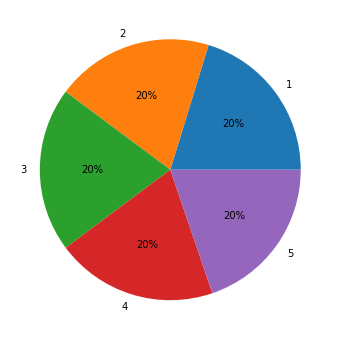

In [173]:
prioridad=df["Customer_rating"].value_counts().reset_index() 
prioridad.columns=["Puntaje","Cant"]
prioridad=prioridad.sort_values("Puntaje").reset_index().drop(["index"], axis=1)
fig = plt.figure(figsize = (6, 6), facecolor="white")
colors= sns.color_palette('tab10')
plt.pie(prioridad["Cant"], labels=prioridad["Puntaje"], colors = colors, autopct='%.0f%%')
plt.show()

### Ahora vemos que porcentaje de envios segun el puntaje del cliente no llego a tiempo:

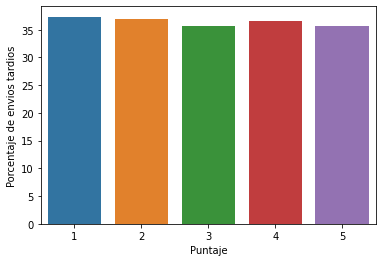

Porcentaje envios tardios para '1 puntos': 37.4 %
Porcentaje envios tardios para '2 puntos': 37.0 %
Porcentaje envios tardios para '3 puntos': 35.7 %
Porcentaje envios tardios para '4 puntos': 36.5 %
Porcentaje envios tardios para '5 puntos': 35.7 %


In [178]:
prioridad_no=df["Customer_rating"][offtime].value_counts().reset_index() #contar solo envios que no llegan desde la columna "Customer_rating"
prioridad_no.columns=["Puntaje","Cant"] #nombro las columnas
prioridad_no=prioridad_no.sort_values("Puntaje").reset_index().drop(["index"], axis=1)
ax=sns.barplot(x=prioridad["Puntaje"], y=(prioridad_no["Cant"]/prioridad["Cant"]*100)).set_ylabel("Porcentaje de envios tardios")
plt.show()
print ("Porcentaje envios tardios para '1 puntos':", round((prioridad_no["Cant"][0]/prioridad["Cant"][0]*100),1), "%")
print ("Porcentaje envios tardios para '2 puntos':", round((prioridad_no["Cant"][1]/prioridad["Cant"][1]*100),1), "%")
print ("Porcentaje envios tardios para '3 puntos':", round((prioridad_no["Cant"][2]/prioridad["Cant"][2]*100),1), "%")
print ("Porcentaje envios tardios para '4 puntos':", round((prioridad_no["Cant"][3]/prioridad["Cant"][3]*100),1), "%")
print ("Porcentaje envios tardios para '5 puntos':", round((prioridad_no["Cant"][4]/prioridad["Cant"][4]*100),1), "%")

-Observamos que la distribución, entre los envios que llegaron a tiempo y los que no según el puntaje del cliente, son:

- Puntaje 1: 1823 envios, 1142 envios a tiempo, 681 envios tardios, 37.4 % de los envios con 1 punto no llegaron a tiempo.
- Puntaje 2: 1759 envios, 1109 envios a tiempo, 650 envios tardios, 37.0 % de los envios con 2 punto no llegaron a tiempo.
- Puntaje 3: 1836 envios, 1180 envios a tiempo, 656 envios tardios, 35.7 % de los envios con 3 punto no llegaron a tiempo.
- Puntaje 4: 1802 envios, 1144 envios a tiempo, 658 envios tardios, 36.5 % de los envios con 4 punto no llegaron a tiempo.
- Puntaje 5: 1779 envios, 1144 envios a tiempo, 635 envios tardios, 35.7 % de los envios con 5 punto no llegaron a tiempo.


Se puede advertir que mientras menor sea el puntaje recibido, sube el porcentaje de envios que no llegan a tiempo, aunque la diferencia es muy poca.<br>

### Columna "Cost_of_the_Product" (Costo del producto)

-Como se puede observar esta columna nos indica el precio del producto que se enviaen cada transaccion.<br>
Encontramos que el precio es una variable continua que varía entre 96 y 310.

In [24]:
#vemos los valores que puede tomar la variable

df["Cost_of_the_Product"].unique()

array([177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198,
       275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234,
       266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169,
       160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261,
       202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185,
       278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168,
       265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237,
       264, 248, 191, 146, 135,  98,  97, 114, 112, 274, 166, 148, 270,
       242, 192, 116, 255, 209, 134, 130, 133, 140, 136, 142, 154, 155,
       127, 129, 159, 294, 226, 258, 241, 208, 182, 115, 212, 171, 249,
       243, 163, 272, 138, 273, 279, 173, 194, 262, 201, 260, 188, 267,
       131, 122, 103, 199, 236, 167, 259, 178, 123, 124,  96, 244, 254,
       128, 204, 245, 228, 268, 108, 276, 214, 281, 253, 104, 240, 121,
       153, 111, 117, 195, 110, 119, 196, 291, 118, 283, 100, 25

In [16]:
#Vemos los valores max y min que alcanza la variable
df["Cost_of_the_Product"].max(), df["Cost_of_the_Product"].min()

(310, 96)

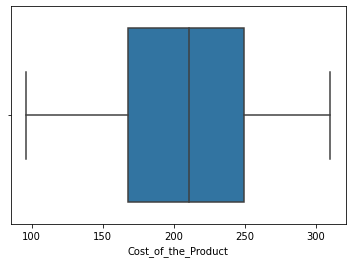

In [6]:
#Buscamos Outliers
sns.boxplot(x = 'Cost_of_the_Product', data =df)
plt.show()

### Graficamos su distribución:<br>

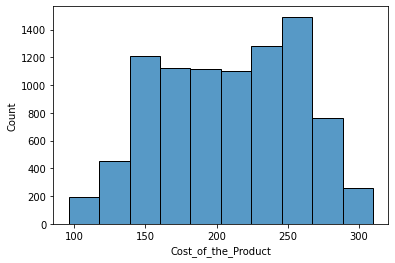

In [25]:
sns.histplot(data=df, x="Cost_of_the_Product", bins=10)
plt.show()

### Graficamos su distribución teniendo en cuenta cuales llegaron a destino a tiempo y cuales no:<br>

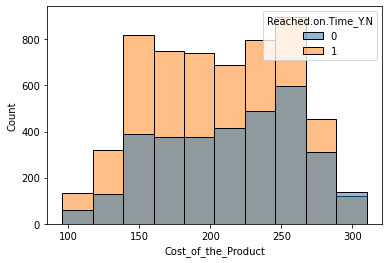

In [17]:
sns.histplot(data=df, x="Cost_of_the_Product", hue="Reached.on.Time_Y.N", bins=10)
plt.show()

Observamos que a medida que el precio aumenta, el porcentaje de envios tardios tambien lo hace.<br>
Podemos apreciar que, a partir de precios mayores a 200, son mas los envios que no llegaron a tiempo que los que si.

### Columna "Prior_purchases" (Compra previa)

-Como se puede observar esta columna nos indica si el cliente compro previamente.<br>
Encontramos que las compras previas toma valores entre 2 y 10.


In [26]:
#vemos los valores que puede tomar la variable

df["Prior_purchases"].unique()

array([ 3,  2,  4,  6,  5,  7, 10,  8], dtype=int64)

In [28]:
#contamos las compras previas para cada de cada envio

df["Prior_purchases"].value_counts()

3     3347
2     2239
4     1752
5      863
6      402
10     152
7      126
8      118
Name: Prior_purchases, dtype: int64

In [29]:
#Contamos las compras previas que efectuo el cliente para los casos de que el envio llego a tiempo

df["Prior_purchases"][ontime].value_counts()

3     2269
2     1469
4      998
5      481
6      246
10      92
7       88
8       76
Name: Prior_purchases, dtype: int64

In [30]:
#Contamos las compras previas que efectuo el cliente para los casos de que el envio no llego a tiempo

df["Prior_purchases"][offtime].value_counts()

3     1078
2      770
4      754
5      382
6      156
10      60
8       42
7       38
Name: Prior_purchases, dtype: int64

### Graficamos su distribución en barras separadas, por cantidad de envios que no llegaron a tiempo y que si llegaron a tiempo:<br>

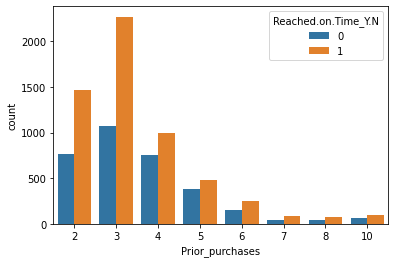

In [31]:
sns.countplot(data=df, x="Prior_purchases", hue="Reached.on.Time_Y.N")
plt.show()

### Graficamos su distribución en diagrama de torta, vemos el porcentaje de envios segun compras previas efectuadas:<br>

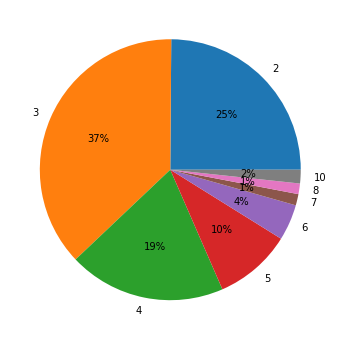

In [32]:
imp=df["Prior_purchases"].value_counts().reset_index() 
imp.columns=["Prioridad","Cant"]
imp=imp.sort_values("Prioridad").reset_index().drop(["index"], axis=1)
fig = plt.figure(figsize = (6, 6), facecolor="white")
colors= sns.color_palette('tab10')
plt.pie(imp["Cant"], labels=imp["Prioridad"], colors = colors, autopct='%.0f%%')
plt.show()

### Ahora vemos que porcentaje de envios segun las compras previas efectuadas no llego a tiempo:

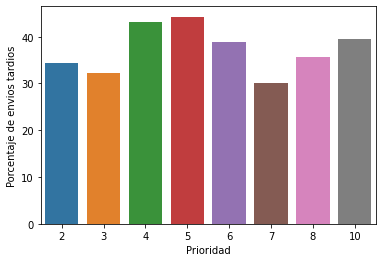

Porcentaje envios tardios para 'Prioridad 2' : 34.4 %
Porcentaje envios tardios para 'Prioridad 3' : 32.2 %
Porcentaje envios tardios para 'Prioridad 4' : 43.0 %
Porcentaje envios tardios para 'Prioridad 5' : 44.3 %
Porcentaje envios tardios para 'Prioridad 6' : 38.8 %
Porcentaje envios tardios para 'Prioridad 7' : 30.2 %
Porcentaje envios tardios para 'Prioridad 8' : 35.6 %
Porcentaje envios tardios para 'Prioridad 10': 39.5 %


In [34]:
prioridad_no=df["Prior_purchases"][offtime].value_counts().reset_index() #contar solo envios que no llegan desde la columna "Customer_rating"
prioridad_no.columns=["Prioridad","Cant"] #nombro las columnas
prioridad_no=prioridad_no.sort_values("Prioridad").reset_index().drop(["index"], axis=1)
ax=sns.barplot(x=imp["Prioridad"], y=(prioridad_no["Cant"]/imp["Cant"]*100)).set_ylabel("Porcentaje de envios tardios")
plt.show()
print ("Porcentaje envios tardios para 'Prioridad 2' :", round((prioridad_no["Cant"][0]/imp["Cant"][0]*100),1), "%")
print ("Porcentaje envios tardios para 'Prioridad 3' :", round((prioridad_no["Cant"][1]/imp["Cant"][1]*100),1), "%")
print ("Porcentaje envios tardios para 'Prioridad 4' :", round((prioridad_no["Cant"][2]/imp["Cant"][2]*100),1), "%")
print ("Porcentaje envios tardios para 'Prioridad 5' :", round((prioridad_no["Cant"][3]/imp["Cant"][3]*100),1), "%")
print ("Porcentaje envios tardios para 'Prioridad 6' :", round((prioridad_no["Cant"][4]/imp["Cant"][4]*100),1), "%")
print ("Porcentaje envios tardios para 'Prioridad 7' :", round((prioridad_no["Cant"][5]/imp["Cant"][5]*100),1), "%")
print ("Porcentaje envios tardios para 'Prioridad 8' :", round((prioridad_no["Cant"][6]/imp["Cant"][6]*100),1), "%")
print ("Porcentaje envios tardios para 'Prioridad 10':", round((prioridad_no["Cant"][7]/imp["Cant"][7]*100),1), "%")

Observamos que, si bien las compras previas no está distribuida de forma proporcional, no se ve una clara tendencia a la disminucion o aumento de envios tardios acorde a las compras previas efectuadas.<br>

### Columna "Product_importance" (Importancia del producto)

-Como se puede observar esta columna nos indica la importancia del producto que se envia en cada transaccion.<br>
Encontramos que la importacia del producto toma tres valores:
- low : importancia baja.
- medium : importancia media.
- high: importancia alta.

In [35]:
#vemos los valores que puede tomar la variable

df["Product_importance"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [36]:
#contamos los valores de importancia para cada envio

df["Product_importance"].value_counts()

low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

In [37]:
#Contamos los valores que llegaron a tiempo segun la importancia

df["Product_importance"][ontime].value_counts()

low       2722
medium    2443
high       554
Name: Product_importance, dtype: int64

In [38]:
#Contamos los valores que no llegaron a tiempo segun la importancia

df["Product_importance"][offtime].value_counts()

low       1586
medium    1415
high       279
Name: Product_importance, dtype: int64

### Graficamos su distribución en barras separadas, por cantidad de envios que no llegaron a tiempo y que si llegaron a tiempo:<br>

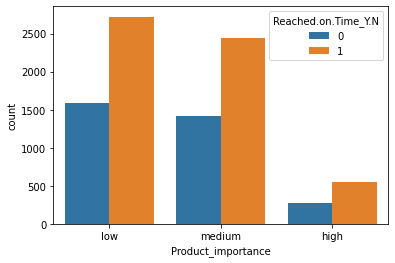

In [39]:
sns.countplot(data=df, x="Product_importance", hue="Reached.on.Time_Y.N")
plt.show()

### Graficamos su distribución en diagrama de torta, vemos el porcentaje de envios segun la importancia:<br>

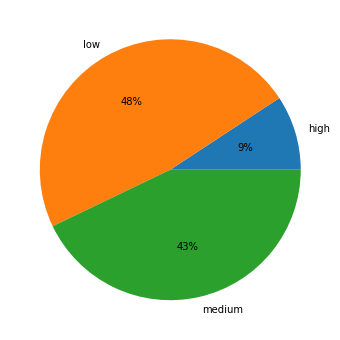

In [56]:
genero=df["Product_importance"].value_counts().reset_index() 
genero.columns=["Importancia","Cant"]
genero=genero.sort_values("Importancia").reset_index().drop(["index"], axis=1)
fig = plt.figure(figsize = (6, 6), facecolor="white")
colors= sns.color_palette('tab10')
plt.pie(genero["Cant"], labels=genero["Importancia"], colors = colors, autopct='%.0f%%')
plt.show()

La importacia Baja y Media ocupa el 91% de los envios.

### Ahora vemos que porcentaje de envios segun su importancia no llego a tiempo:

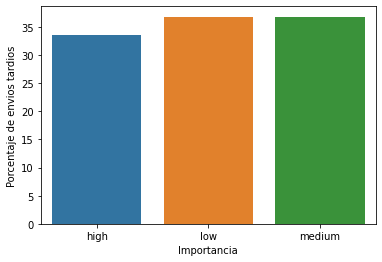

Porcentaje envios tardios para 'High'  : 33.5 %
Porcentaje envios tardios para 'Medium': 36.7 %
Porcentaje envios tardios para 'Low'   : 36.8 %


In [44]:
imp_no=df["Product_importance"][offtime].value_counts().reset_index() #contar solo envios que no llegan desde la columna "Customer_rating"
imp_no.columns=["Importancia","Cant"] #nombro las columnas
imp_no=imp_no.sort_values("Importancia").reset_index().drop(["index"], axis=1)
ax=sns.barplot(x=genero["Importancia"], y=(imp_no["Cant"]/genero["Cant"]*100)).set_ylabel("Porcentaje de envios tardios")
plt.show()
print ("Porcentaje envios tardios para 'High'  :", round((imp_no["Cant"][0]/genero["Cant"][0]*100),1), "%")
print ("Porcentaje envios tardios para 'Medium':", round((imp_no["Cant"][2]/genero["Cant"][2]*100),1), "%")
print ("Porcentaje envios tardios para 'Low'   :", round((imp_no["Cant"][1]/genero["Cant"][1]*100),1), "%")

Podemos observar un pequeño aumento en los envios tardios para los envios con importacia Media y Baja.<br>
Además se observa una pequeña disminucion de envios tardios con importancia Alta.

### Columna "Gender" (Género)

-Como se puede observar esta columna nos indica el género del cliente para cada transaccion.<br>
Encontramos que el género toma 2 valores:
- F : Femenino.
- M : Masculino.

In [45]:
#vemos los valores que puede tomar la variable

df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [47]:
#contamos los valores de genero para cada envio

df["Gender"].value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [49]:
#Contamos los valores que llegaron a tiempo segun el género

df["Gender"][ontime].value_counts()

F    2879
M    2840
Name: Gender, dtype: int64

In [50]:
#Contamos los valores que no llegaron a tiempo segun el género

df["Gender"][offtime].value_counts()

F    1661
M    1619
Name: Gender, dtype: int64

### Graficamos su distribución en barras separadas, por cantidad de envios que no llegaron a tiempo y que si llegaron a tiempo:<br>

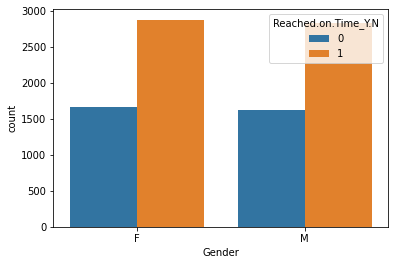

In [51]:
sns.countplot(data=df, x="Gender", hue="Reached.on.Time_Y.N")
plt.show()

### Graficamos su distribución en diagrama de torta, vemos el porcentaje de envios segun el género:<br>

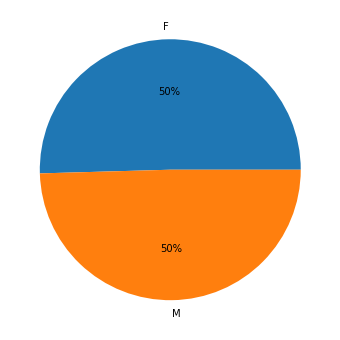

In [57]:
genero=df["Gender"].value_counts().reset_index() 
genero.columns=["Genero","Cant"]
genero=genero.sort_values("Genero").reset_index().drop(["index"], axis=1)
fig = plt.figure(figsize = (6, 6), facecolor="white")
colors= sns.color_palette('tab10')
plt.pie(genero["Cant"], labels=genero["Genero"], colors = colors, autopct='%.0f%%')
plt.show()

Podemos apreciar que la mitad de las compras son efectuadas por Mujeres y la otra mitad por Hombres.

### Ahora vemos que porcentaje de envios segun el genero no llego a tiempo:

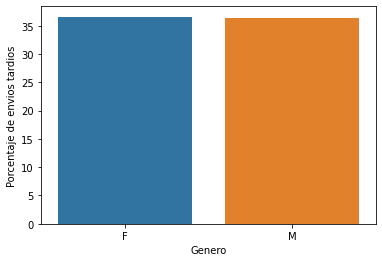

Porcentaje envios tardios para 'F': 36.6 %
Porcentaje envios tardios para 'M': 36.3 %


In [59]:
genero_no=df["Gender"][offtime].value_counts().reset_index() #contar solo envios que no llegan desde la columna "Customer_rating"
genero_no.columns=["Genero","Cant"] #nombro las columnas
genero_no=genero_no.sort_values("Genero").reset_index().drop(["index"], axis=1)
ax=sns.barplot(x=genero["Genero"], y=(genero_no["Cant"]/genero["Cant"]*100)).set_ylabel("Porcentaje de envios tardios")
plt.show()
print ("Porcentaje envios tardios para 'F':", round((genero_no["Cant"][0]/genero["Cant"][0]*100),1), "%")
print ("Porcentaje envios tardios para 'M':", round((genero_no["Cant"][1]/genero["Cant"][1]*100),1), "%")

Observamos que el porcentaje de envios tardios, tanto para el genero F como para el M es el mismo, por lo tanto y como era de esperar, el genero no influye directamente en si el envio va allegar a tiempo o no.

### Columna "Discount_offered" (Descuentos ofrecidos)

-Como se puede observar esta columna nos indica los descuentos ofrecidos sobre el producto que se envia en cada transaccion.<br>
Encontramos que el descuento es una variable continua que varía entre 1 y 65.


In [60]:
#vemos los valores que puede tomar la variable

df["Discount_offered"].unique()

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30],
      dtype=int64)

In [61]:
#Vemos los valores max y min que alcanza la variable
df["Discount_offered"].max(), df["Discount_offered"].min()

(65, 1)

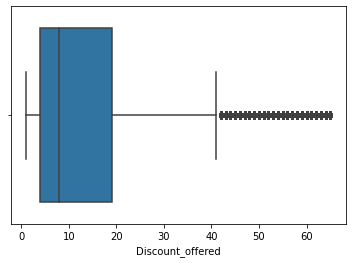

In [8]:
#Buscamos outliers
sns.boxplot(x = 'Discount_offered', data =df)
plt.show()

In [15]:
#Utilizaremos la técnica del rango intercuartílico para eliminar outliers.

Q1 = df['Discount_offered'].quantile(0.25)
Q3 = df['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
BS = Q3 + 1.5*IQR
print(BS)
print('Cantidad de registros totales:', df.shape[0])
print('Cantidad de outliers:', df[(df['Discount_offered']>BS)].shape[0] )

41.5
Cantidad de registros totales: 8999
Cantidad de outliers: 1193


La cantidad de outlier es muy alta, se procederan a borrar los registros en caso de utilizar dicha variable

### Graficamos su distribución:<br>

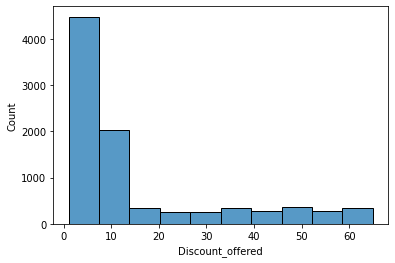

In [64]:
sns.histplot(data=df, x="Discount_offered", bins=10)
plt.show()

### Graficamos su distribución teniendo en cuenta cuales llegaron a destino a tiempo y cuales no:<br>

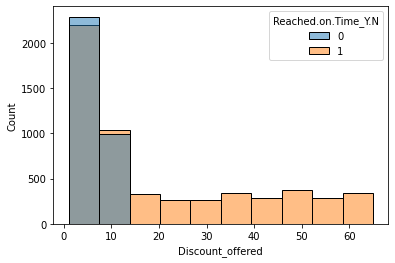

In [65]:
sns.histplot(data=df, x="Discount_offered", hue="Reached.on.Time_Y.N", bins=10)
plt.show()

Se observa que a medida que aumentan los descuentos, disminuye la cantidad de envios que no llegan a tiempo.<br>
Por otro lado, los productos con menores descuentos tienden a no llegar a tiempo.

### Columna "Weight_in_gms" (Peso en Gramos)

-Como se puede observar esta columna nos indica el peso en gramos del producto que se envia en cada transaccion.<br>
Encontramos que el peso en gramos es una variable continua que varía entre 1001 y 7846 grms.


In [66]:
#vemos los valores que puede tomar la variable

df["Weight_in_gms"].unique()

array([1233, 3088, 3374, ..., 4748, 4368, 5648], dtype=int64)

In [67]:
#Vemos los valores max y min que alcanza la variable
df["Weight_in_gms"].max(), df["Weight_in_gms"].min()

(7846, 1001)

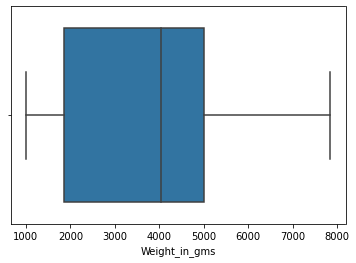

In [16]:
#Buscamos outliers
sns.boxplot(x = 'Weight_in_gms', data =df)
plt.show()

### Graficamos su distribución:<br>

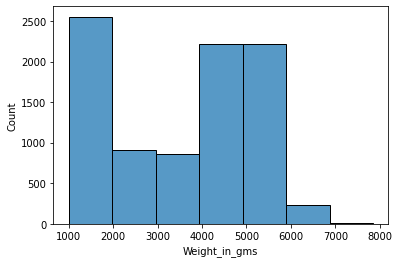

In [74]:
sns.histplot(data=df, x="Weight_in_gms", bins=7)
plt.show()

### Graficamos su distribución teniendo en cuenta cuales llegaron a destino a tiempo y cuales no:<br>

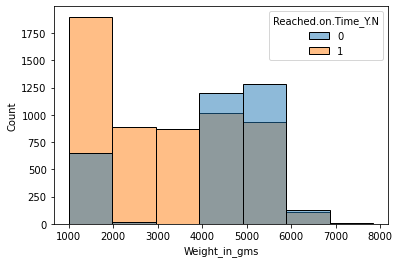

In [76]:
sns.histplot(data=df, x="Weight_in_gms", hue="Reached.on.Time_Y.N", bins=7)
plt.show()

Al parecer, cuando el producto pesa más de 4000grms hay una tendencia a que el producto no llegue a tiempo

# Conclusiones:

- La columna "ID" no contiene datos relevantes para el estudio, por lo tanto se elimina.
- La columna "Warehouse_block" contiene datos que podrían confundir al modelo ya que no hay una clara relación con nuestro objetivo, por lo tanto no se tendrá en cuenta.
- La columna "Mode_of_shipment" será tenida en cuenta ya que el tipo de envio esta relacionado a si el envio llega a tiempo o no.
- La columna "Customer_care_calls" será tenida en cuenta, por lo observado en el analisis, está relacionada con nuestro objetivo.
- La columna "Customer_rating" no será tenida en cuenta ya que no aporta datos significantes.
- La columna "Cost_of_the_Product" se correlaciona con nuestro objentivo, por lo tanto será tenida en cuenta en un principio.
- La columna "Prior_purchases" no será tenida en cuenta ya que no aporta datos significantes ni está relacionada al objetivo.
- La columna "Product_importance" no será tenida en cuenta ya que no aporta datos significantes y puede desbalancer nuestro modelo.
- La columna "Gender" no será tenida en cuenta, es irrelevante.
- La columna "Discount_offered", en un principio, será tenida en cuenta para la creacion del modelo ya que muestra una relacion que puede ser util con nuestro objetivo.
- La columna "Weight_in_gms" se tendrá en cuenta para el analisis ya que afecta a nuestro objetivo.

## EN EL ARCHIVO DATATHON(ML) SE ENCUENTRA EL DESARROLLO DEL MODELO DE ML